## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

/home/pdb/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Load dataset

In [2]:
data = pd.read_csv('../data/info_per_district_and_meters.csv')
df = pd.read_csv('../data/info_per_apartment.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   distrito               256 non-null    object 
 1   mean_meters            256 non-null    float64
 2   advertised_rent_time   256 non-null    float64
 3   advertised_sell_time   256 non-null    float64
 4   size_rent              256 non-null    float64
 5   size_sell              256 non-null    float64
 6   €/meter_rent           256 non-null    float64
 7   €/meter_sell           256 non-null    float64
 8   apartments             256 non-null    int64  
 9   RB                     256 non-null    float64
 10  PER                    256 non-null    float64
 11  change_2014_2024_sell  256 non-null    float64
 12  change_2014_2024_rent  256 non-null    float64
 13  change_2021_2024_sell  256 non-null    float64
 14  change_2021_2024_rent  256 non-null    float64
 15  sell  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29297 entries, 0 to 29296
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distrito         29297 non-null  object 
 1   href             29297 non-null  object 
 2   price            29279 non-null  float64
 3   meters           29279 non-null  float64
 4   hab              27868 non-null  object 
 5   floor            25830 non-null  object 
 6   parking          11006 non-null  object 
 7   state            29297 non-null  object 
 8   description      29101 non-null  object 
 9   advertised_time  29297 non-null  float64
 10  mean_meters      29102 non-null  float64
 11  €/meter          29279 non-null  float64
dtypes: float64(5), object(7)
memory usage: 2.7+ MB


## Plot functions

In [5]:
def plot_aux(aux, _type, title, log=False, height=800):
    fig = px.bar(aux, x="distrito", y=_type, color="mean_meters", color_continuous_scale='blues')
    layout_dict = {
        'width': 1100,
        'height': height,
        'xaxis': dict(categoryorder='total descending'),
        'yaxis': dict(title="Percentage", type='log') if log else None,
        'title': title,
        'legend_title_text': None,
        'barmode': 'group',
        'template': 'plotly_white'
    }
    fig.update_layout(**layout_dict)
    fig.show()

def plt_scatter(aux, x, y, title, xlabel=None, ylabel=None):
    fig = px.scatter(aux, x=x, y=y, color='distrito')
    layout_dict= {
        'template': 'plotly_white',
        'title': title,
        'xaxis_title': xlabel,
        'yaxis_title': ylabel
    }
    fig.update_layout(**layout_dict)
    fig.show()

## Average Square Meters Per District

This bar plot showcases the average square meters of properties across various districts.

**Key Takeaways:**
- Districts with higher average square meters might indicate areas with larger properties, possibly suburban regions.
- The y axis represents the average size, helping to easily identify larger or smaller properties visually.

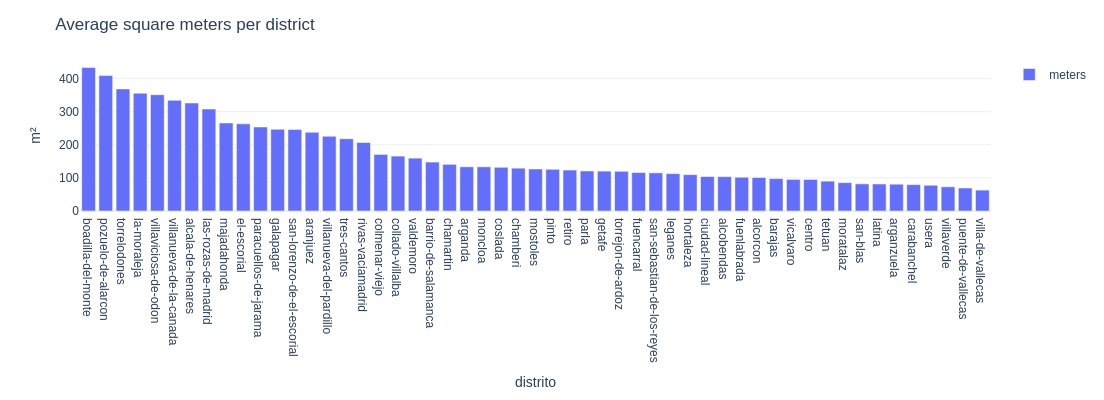

In [6]:
average_meters = df.groupby('distrito')['meters'].mean()
fig = px.bar(average_meters, color_continuous_scale=['blues'])
fig.update_layout(
    width=1100,
    height=400,
    title="Average square meters per district",
    xaxis={'categoryorder': 'total descending'},
    yaxis_title='m²',
    legend_title_text=None,
    template='plotly_white')
fig.show()

## Percentage of selling/renting apartments per district 

The bar plot represents the total apartments built per district. The line plots on top represent the percentage of apartments that are for sale or for rent in each district, check right y axis to know the values.

**Key Takeaways:**

- The most crouded districts are the ones on the left side of the plot, ex. carabanchel, latina, etc.
- In districts like centro, barrio de salamanca or la moraleja, the number of aparments for sale and for renting are considerably higher compared to the rest.
- What happens where there are high number of apartments for sale and low for rent? good place to invest?

In [8]:
data.columns

Index(['distrito', 'mean_meters', 'advertised_rent_time',
       'advertised_sell_time', 'size_rent', 'size_sell', '€/meter_rent',
       '€/meter_sell', 'apartments', 'RB', 'PER', 'change_2014_2024_sell',
       'change_2014_2024_rent', 'change_2021_2024_sell',
       'change_2021_2024_rent', 'sell', 'rent', 'revaluation', 'PER_adjusted',
       'norm_revaluation', 'norm_RB', 'inverse_PER', 'norm_PER'],
      dtype='object')

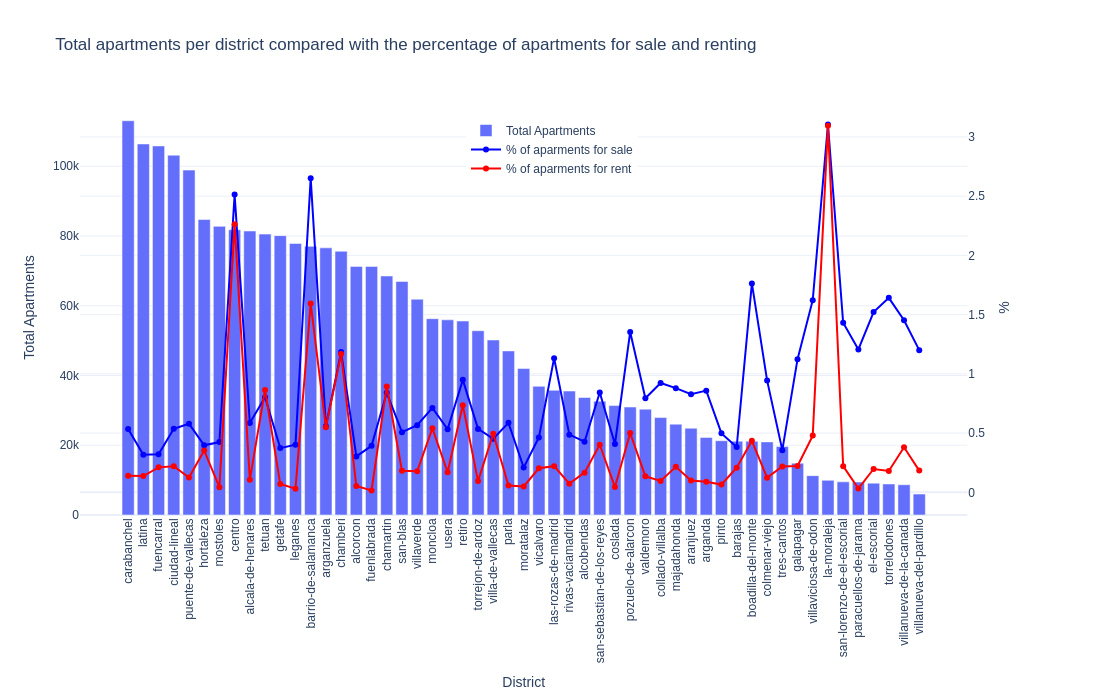

In [18]:
aux = data[['distrito', 'mean_meters', 'apartments', 'size_sell', 'size_rent', 'advertised_rent_time']].copy()
aux = aux.groupby(['distrito', 'apartments']).agg(
    {'size_sell': 'sum', 'size_rent': 'sum', 'advertised_rent_time': 'mean'}).reset_index()

aux['%sale'] = (aux['size_sell'] / aux['apartments']) * 100
aux['%rent'] = (aux['size_rent'] / aux['apartments']) * 100

aux = aux.sort_values(by='apartments', ascending=False)

title = 'Total apartments per district compared with the percentage of apartments for sale and renting'
fig = make_subplots(specs=[[{"secondary_y": True}]])

bar_trace = go.Bar(x=aux['distrito'], y=aux['apartments'], name='Total Apartments')
fig.add_trace(bar_trace, secondary_y=False)

sell_trace = go.Scatter(
    x=aux['distrito'], 
    y=aux['%sale'], 
    name='% of aparments for sale', 
    mode='lines+markers',
    line=dict(dash='solid', color='blue')
)
rent_trace = go.Scatter(
    x=aux['distrito'], 
    y=aux['%rent'], 
    name='% of aparments for rent', 
    mode='lines+markers',
    line=dict(dash='solid', color='red')
)
fig.add_trace(sell_trace, secondary_y=True)
fig.add_trace(rent_trace, secondary_y=True)

layout_dict = {
    'width': 1200,
    'height': 700,
    'title': title,
    'xaxis': dict(title='District', tickangle=-90),
    'template': 'plotly_white', 
    'legend': dict(yanchor='bottom', y=0.8, xanchor='center', x=0.5)
}
fig.update_layout(**layout_dict)
fig.update_yaxes(title_text="Total Apartments", secondary_y=False)
fig.update_yaxes(title_text="%", secondary_y=True)
fig.show()

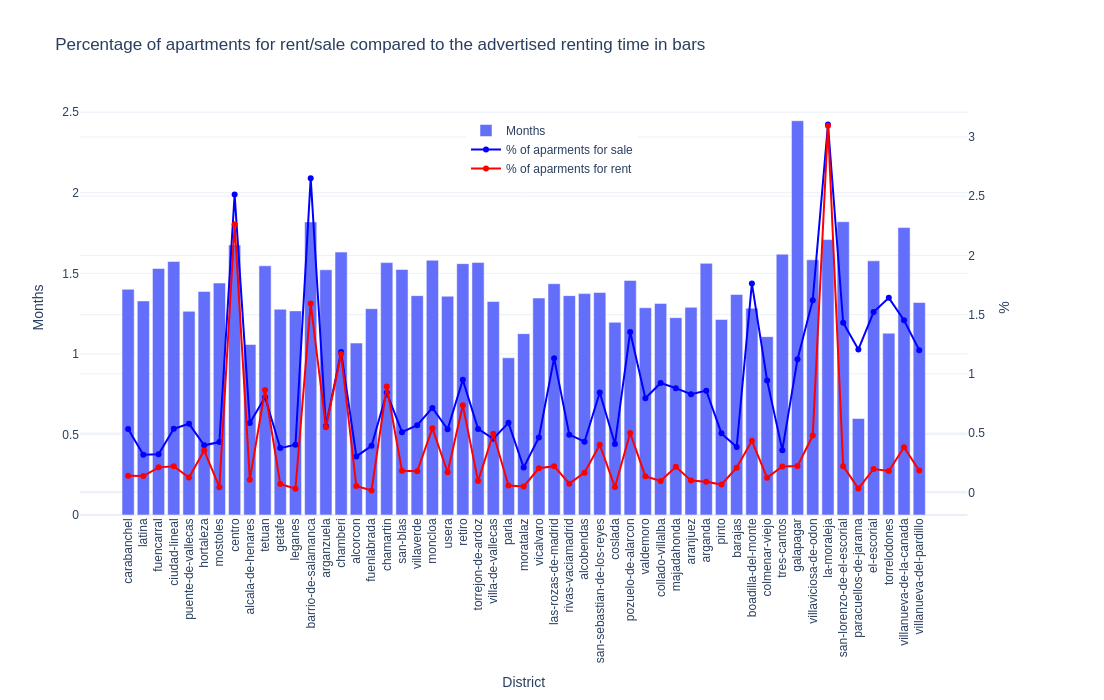

In [22]:
title = 'Percentage of apartments for rent/sale compared to the advertised renting time in bars'
fig = make_subplots(specs=[[{"secondary_y": True}]])

bar_trace = go.Bar(x=aux['distrito'], y=aux['advertised_rent_time'], name='Months')
fig.add_trace(bar_trace, secondary_y=False)

sell_trace = go.Scatter(
    x=aux['distrito'], 
    y=aux['%sale'], 
    name='% of aparments for sale', 
    mode='lines+markers',
    line=dict(dash='solid', color='blue')
)
rent_trace = go.Scatter(
    x=aux['distrito'], 
    y=aux['%rent'], 
    name='% of aparments for rent', 
    mode='lines+markers',
    line=dict(dash='solid', color='red')
)
fig.add_trace(sell_trace, secondary_y=True)
fig.add_trace(rent_trace, secondary_y=True)

layout_dict = {
    'width': 1200,
    'height': 700,
    'title': title,
    'xaxis': dict(title='District', tickangle=-90),
    'template': 'plotly_white', 
    'legend': dict(yanchor='bottom', y=0.8, xanchor='center', x=0.5)
}
fig.update_layout(**layout_dict)
fig.update_yaxes(title_text="Months", secondary_y=False)
fig.update_yaxes(title_text="%", secondary_y=True)
fig.show()

## Average price per square meter (€/m²)

The two plots display the mean cost per square meter (€/m²) of properties for sale and rent, respectively, across different districts. Each line in the plots represents a specific property size category (e.g., 30 m², 50 m², etc.) with a color scale.

1. **Rental Market**: This plot illustrates the variations in mean €/m² for rental properties across districts.
2. **Sale Market**: This plot shows the variations in mean €/m² for property sale prices across districts.


**Key Takeaways**
- The rental market fluctuates way more than the selling market
- Smaller apartments are more expensive to rent per square meter than bigger apartments

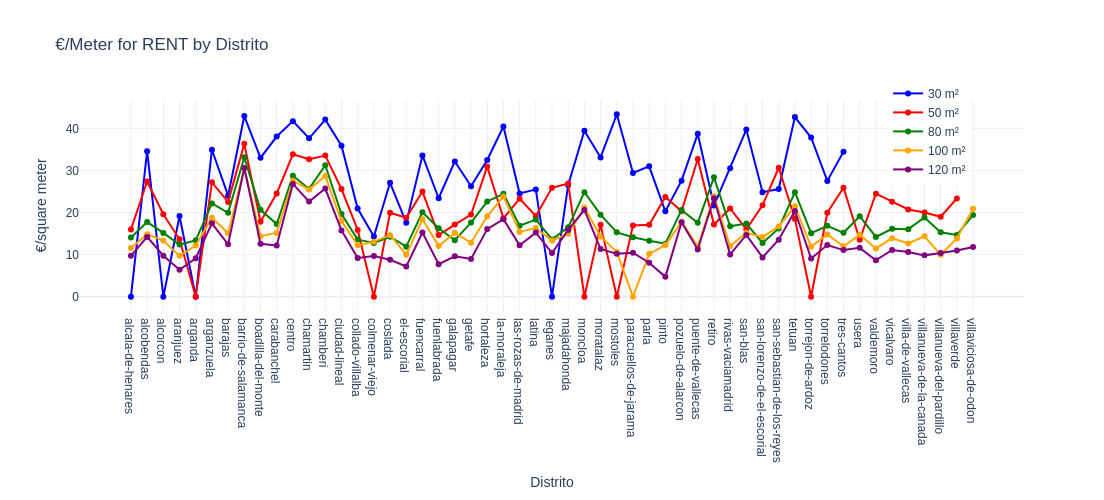

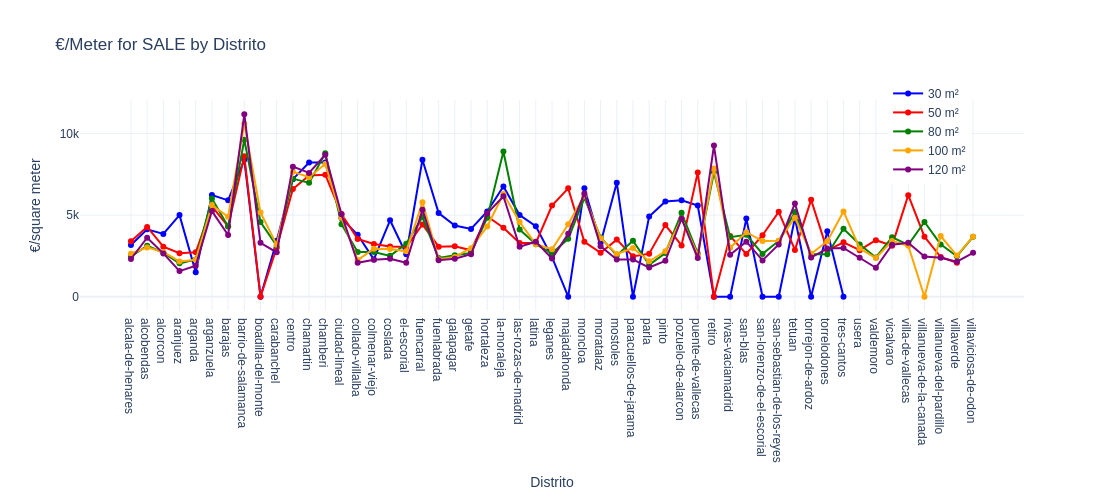

In [33]:
def square_meter_price(aux, item, title):
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    _iter = iter(colors)
    distritos = aux.distrito.unique().tolist()
    fig = go.Figure()
    for meter in aux.mean_meters.unique():
        _30 = aux[aux['mean_meters'] == meter].copy()
        _30 = _30.rename(columns={item: f'{item}_{meter}'})
        fig.add_trace(
            go.Scatter(
                x=distritos,
                y=_30[f'{item}_{meter}'],
                name=f'{int(meter)} m²',
                mode="lines+markers",
                line=dict(color=next(_iter))
            )
        )
    fig.update_layout(
        height=500,
        title=title,
        xaxis=dict(title="Distrito"),
        yaxis=dict(title="€/square meter"),
        template='plotly_white',
        legend=dict(x=0.9, y=1.1, xanchor="center")
    )
    fig.show()
    
aux = data[['distrito', 'mean_meters', '€/meter_rent', '€/meter_sell']].copy()     
square_meter_price(aux, '€/meter_rent', title="€/Meter for RENT by Distrito")
square_meter_price(aux, '€/meter_sell', title="€/Meter for SALE by Distrito")

## Property Size vs. Price Across Districts

This scatter plot examines the relationship between property size (in square meters) and price across different districts. 
Each point represents the average values of all the properties in that district.

**Key Takeaways:**
- Clusters indicate similar size-price relationships within districts.
- Outliers may represent premium properties (ex. barrio-de-salamanca, pozuelo) or undervalued ones (ex. alcala-de-henares, aranjuez).
- Helps identify whether larger properties consistently lead to higher prices.

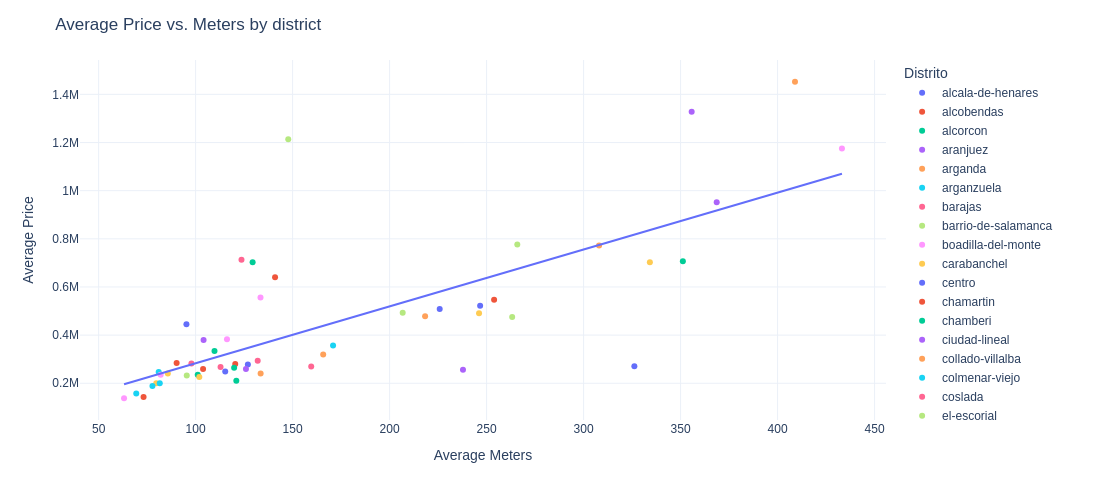

In [16]:
grouped = df.groupby('distrito').agg({'price': 'mean', 'meters': 'mean'}).reset_index()

slope, intercept = np.polyfit(grouped['meters'], grouped['price'], 1)
trend_x = np.linspace(grouped['meters'].min(), grouped['meters'].max(), 100)
trend_y = slope * trend_x + intercept

fig = px.scatter(grouped, x='meters', y='price', color='distrito')
fig.add_traces(px.line(x=trend_x, y=trend_y).data)
fig.update_layout(
    width=1000,
    height=500,
    title='Average Price vs. Meters by district',
    xaxis_title='Average Meters',
    yaxis_title='Average Price',
    legend_title='Distrito',
    template='plotly_white'
)

## Average advertisement time aparments are on Idealista

We are assuming that the last time each add has been updated is the moment when the apartment enter the selling or renting market. 

The time is measured in months and the apartments are divided according to their size.


1. **Fastest apartments to rent out**
- The first plot shows, for each district which size of apartments are rented out the fastest. The color indicates the size and the y left axis indicates how many months are posted on idealista.
- The red points are the Gross Rental Yield for each group of apartments.
- The goal of this plot is to get the apartments that take less time to rent out per district, and check their rental yield. The best one will be the one with less time and highest rental yield, For example, el escorial or parla satisfied those conditions. 

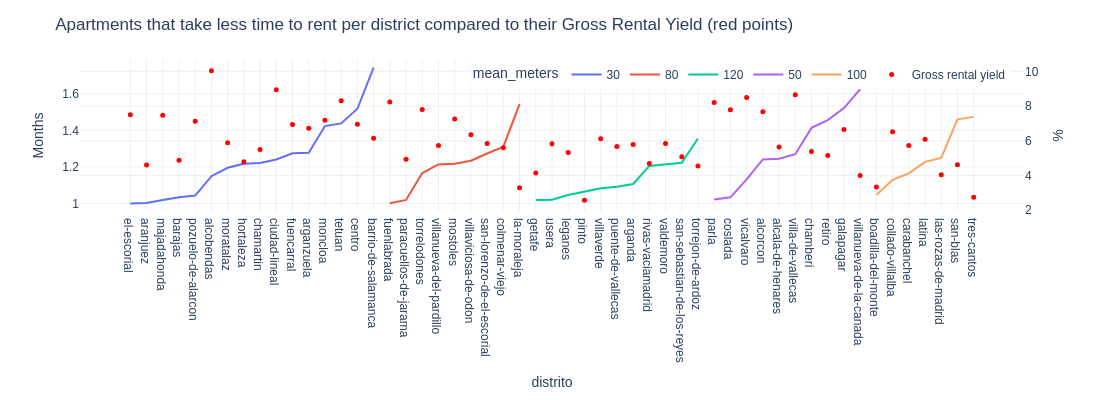

In [50]:
aux = data[['distrito', 'mean_meters', 'advertised_rent_time', 'advertised_sell_time', 'RB']].copy()
aux = aux[(aux != 0).all(axis=1)]
aux['mean_meters'] = aux['mean_meters'].apply(lambda x: int(x))

min_rows = aux.loc[aux.groupby('distrito')['advertised_rent_time'].idxmin()]
min_rows = min_rows.sort_values(by=['advertised_rent_time'])

title = 'Apartments that take less time to rent per district compared to their Gross Rental Yield (red points)'

fig = px.line(min_rows, x='distrito', y=['advertised_rent_time'], color='mean_meters')
fig.add_trace(
    go.Scatter(
        x=min_rows['distrito'],
        y=min_rows['RB'],
        mode='markers',
        name='Gross rental yield',
        marker=dict(color='red', size=5),
        yaxis='y2'
    )
)

fig.update_layout(
    title=title, 
    height=400,
    yaxis=dict(title="Months"),
    yaxis2=dict(
        title="%",
        overlaying='y',
        side='right'
    ),
    template='plotly_white',
    legend=dict(x=0.7, y=1, xanchor="center", orientation='h')
)
fig.show()

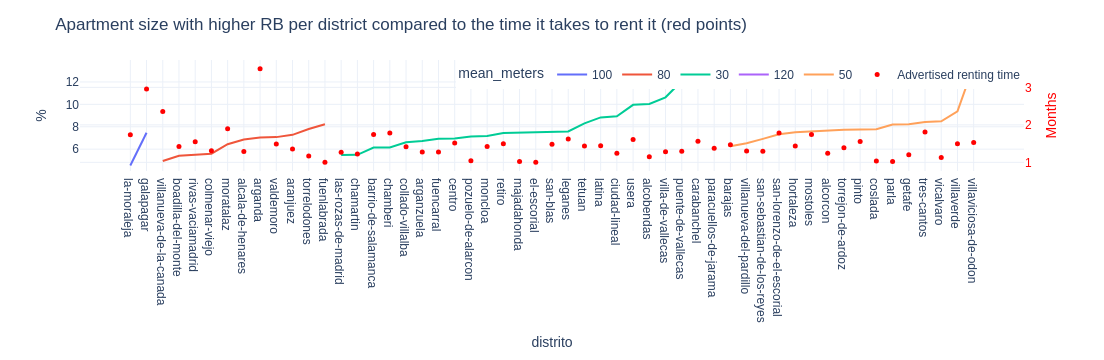

In [324]:
# Apartments with the highest RB, how much time they take to rent out?

max_rb = aux.loc[aux.groupby('distrito')['RB'].idxmax()]
max_rb = max_rb.sort_values(by=['RB'])

fig = px.line(max_rb, x='distrito', y=['RB'], color='mean_meters')
fig.add_trace(
    go.Scatter(
        x=max_rb['distrito'],
        y=max_rb['advertised_rent_time'],
        mode='markers',
        name='Advertised renting time',
        marker=dict(color='red', size=5),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Apartment size with higher RB per district compared to the time it takes to rent it (red points)', 
    height=600,
    yaxis=dict(title="%"),
    yaxis2=dict(
        title="Months",
        overlaying='y',
        side='right', 
        color='red'
    ),
    template='plotly_white',
    legend=dict(x=0.7, y=1, xanchor="center", orientation='h')
)
fig.show()

In [ ]:
# TODO: Which apartments are rented out the slowest? Is the RB way higher than the other ones?

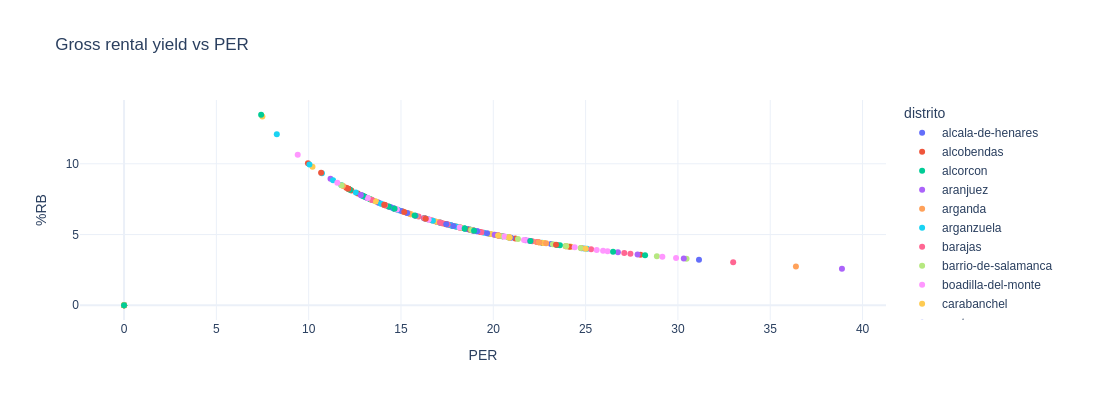

In [40]:
aux = data[['distrito', 'RB', 'PER', 'PER_adjusted', 'mean_meters', 'revaluation']].copy()
title = 'Gross rental yield vs PER'
fig = px.scatter(aux, x='PER', y='RB', color='distrito', title=title,)
fig.update_layout(
    title=title, 
    height=400,
    yaxis=dict(title="%RB"),
        yaxis2=dict(
        title="Money",
        overlaying='y',
        side='right'
    ),
    template='plotly_white',
)

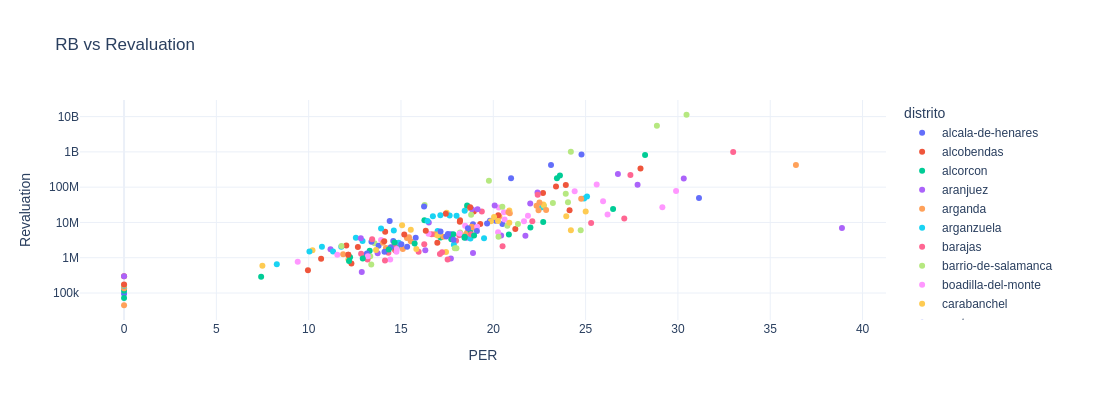

In [44]:
title='RB vs Revaluation'
fig = px.scatter(aux, x='PER', y='revaluation', color='distrito', title=title,)
fig.update_layout(
    title=title, 
    height=400,
    yaxis=dict(title="Revaluation", type='log'),
    template='plotly_white',
)

In [46]:
data.columns

Index(['distrito', 'mean_meters', 'advertised_rent_time',
       'advertised_sell_time', 'size_rent', 'size_sell', '€/meter_rent',
       '€/meter_sell', 'apartments', 'RB', 'PER', 'change_2014_2024_sell',
       'change_2014_2024_rent', 'change_2021_2024_sell',
       'change_2021_2024_rent', 'sell', 'rent', 'revaluation', 'PER_adjusted',
       'norm_revaluation', 'norm_RB', 'inverse_PER', 'norm_PER'],
      dtype='object')

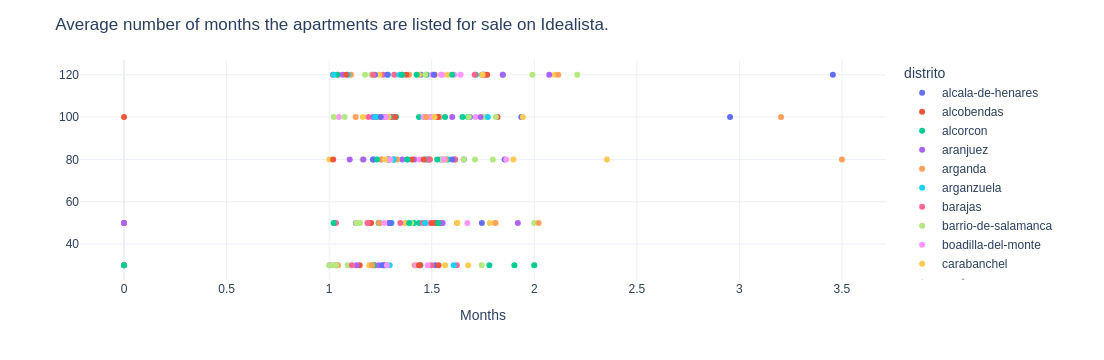

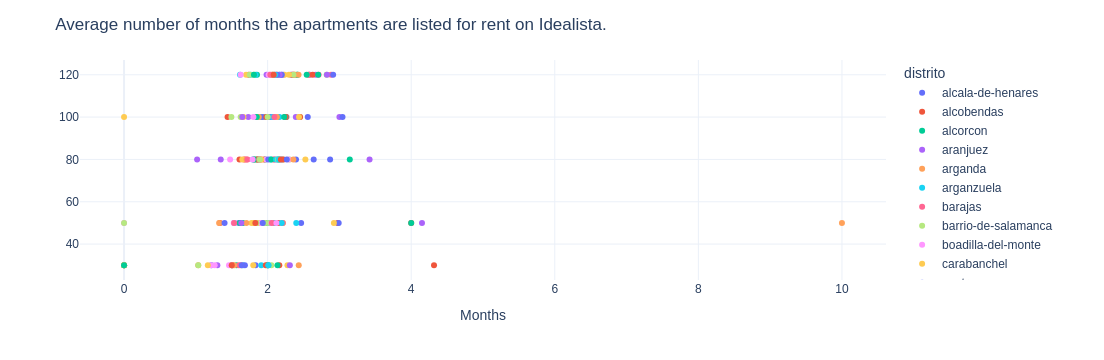

In [179]:
aux = data[['distrito', 'mean_meters', 'advertised_rent_time', 'advertised_sell_time']].copy()

title = 'Average number of months the apartments are listed for sale on Idealista.'
plt_scatter(aux, x='advertised_rent_time', y='mean_meters', title=title, xlabel='Months')
title = 'Average number of months the apartments are listed for rent on Idealista.'
plt_scatter(aux, x='advertised_sell_time', y='mean_meters', title=title, xlabel='Months')

## Advertised selling time vs reting time

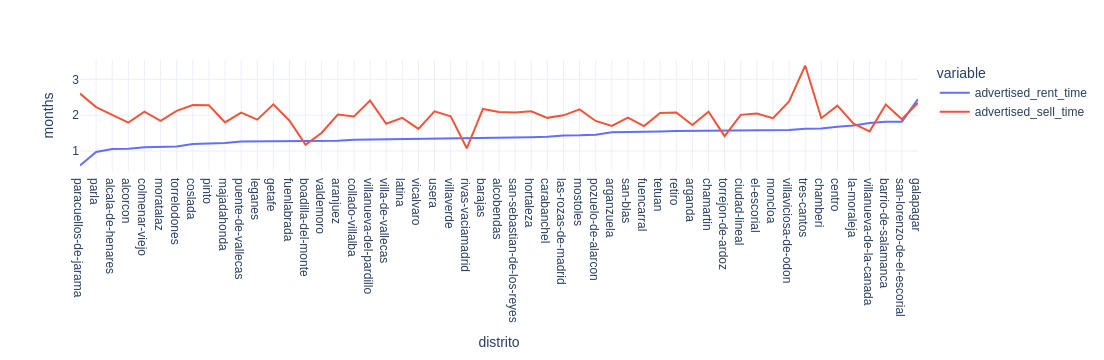

In [77]:
_sort = aux.groupby('distrito').agg({'advertised_rent_time': 'mean', 'advertised_sell_time': 'mean'}).reset_index().sort_values('advertised_rent_time')
title = 'Advertised selling time vs reting time'
fig = px.line(_sort, x='distrito', y=['advertised_rent_time', 'advertised_sell_time'])
fig.update_layout(height=400, template='plotly_white', yaxis_title='months')
fig.show()

## PER, PER adjusted and gross rental yield

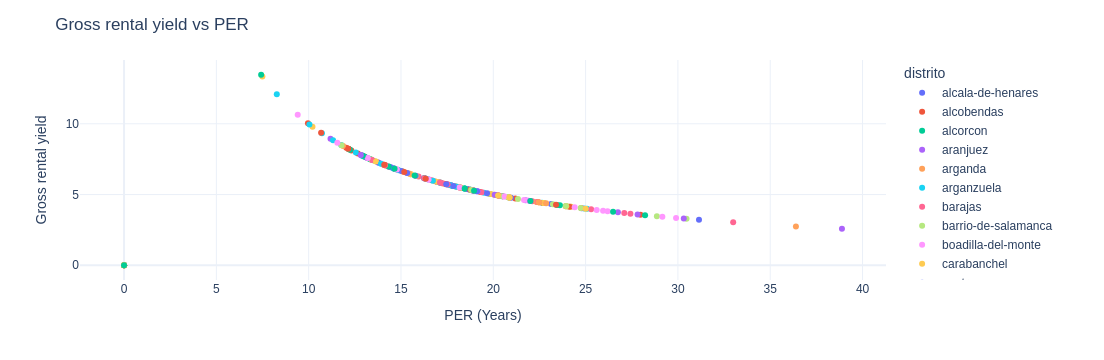

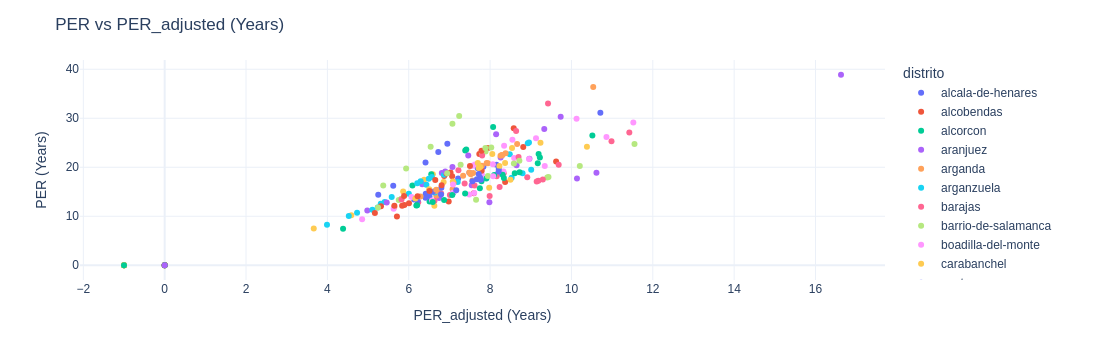

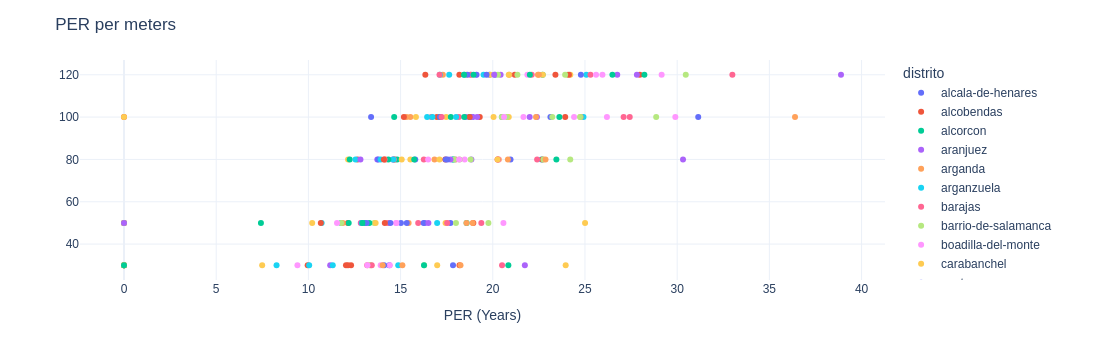

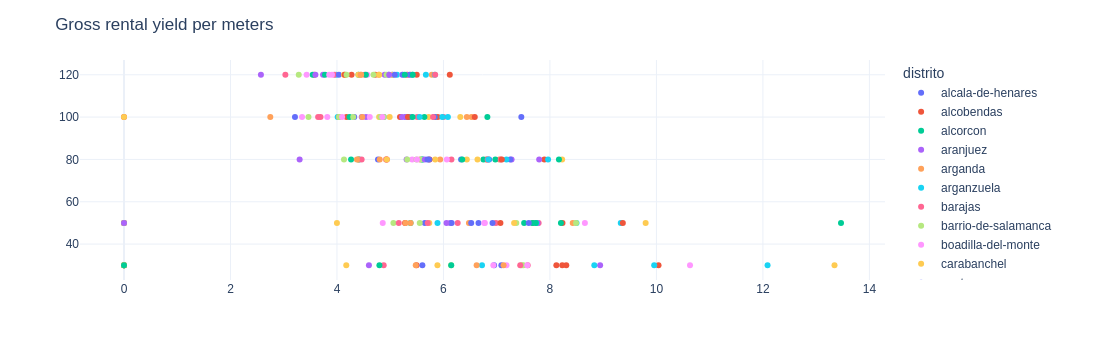

In [13]:
aux = data[['distrito', 'RB', 'PER', 'PER_adjusted', 'mean_meters']].copy()
title = 'Gross rental yield vs PER'
plt_scatter(aux, x='PER', y='RB', title=title, xlabel='PER (Years)', ylabel='Gross rental yield')

title = 'PER vs PER_adjusted (Years)'
plt_scatter(aux, x='PER_adjusted', y='PER', title=title, xlabel='PER_adjusted (Years)', ylabel='PER (Years)')

plt_scatter(aux, x='PER', y='mean_meters', title='PER per meters', xlabel='PER (Years)')
plt_scatter(aux, x='RB', y='mean_meters', title='Gross rental yield per meters', xlabel='')

## Comparison in change rate between last 4 years, to last 10 years

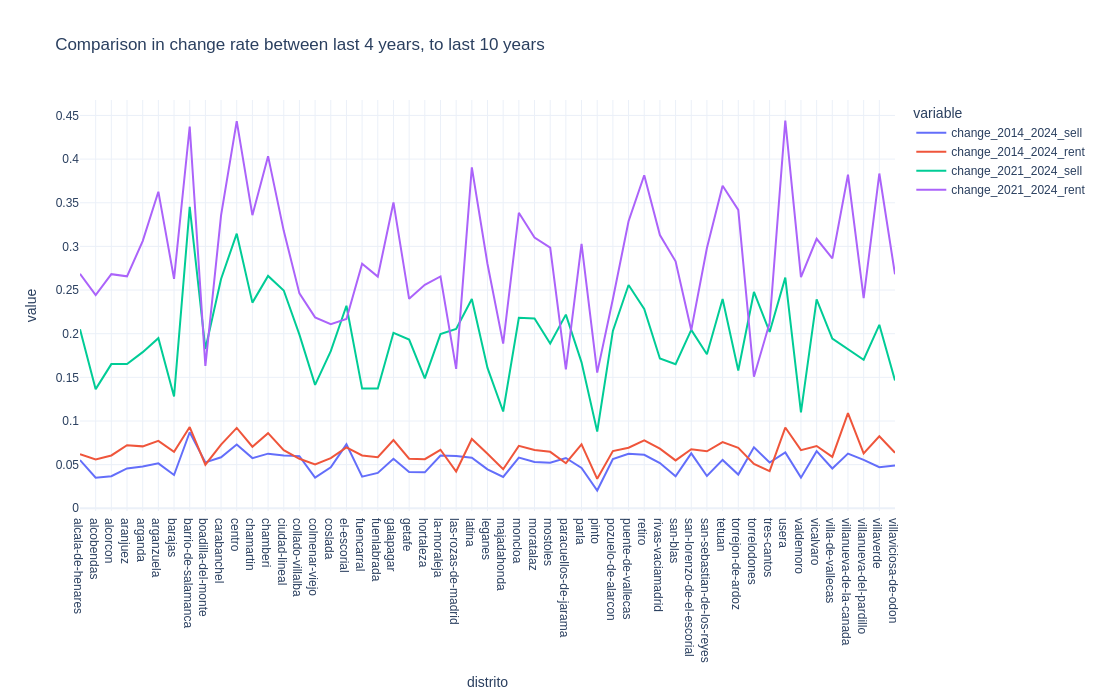

In [49]:
aux = data[['distrito', 'mean_meters', 'change_2014_2024_sell', 'change_2014_2024_rent', 'change_2021_2024_sell', 'change_2021_2024_rent']].copy()
aux = aux.drop_duplicates(subset='distrito', keep='first')

title = 'Comparison in change rate between last 4 years, to last 10 years'
fig = px.line(aux, 
              x='distrito', 
              y=['change_2014_2024_sell', 'change_2014_2024_rent', 'change_2021_2024_sell', 'change_2021_2024_rent'],
             title=title)
fig.update_layout(height=700, template='plotly_white')
fig.show()